In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size,num_steps = 32,35
train_iter,vocab = d2l.load_data_time_machine(batch_size,num_steps)

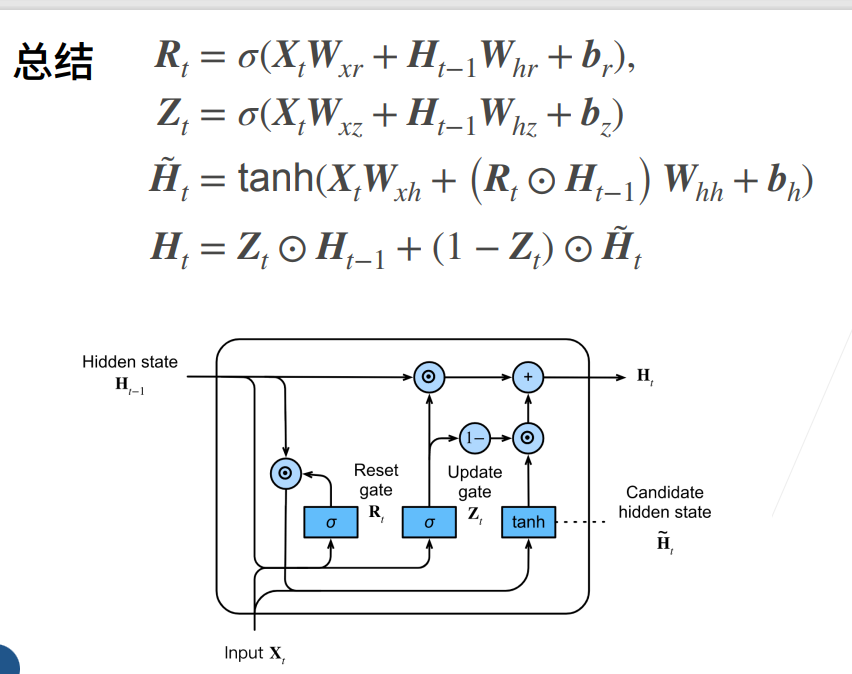

In [2]:
# 初始化模型参数
def get_params(vocab_size,num_hiddens,device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape,device=device)*0.01
    
    def three():
        return (
                normal((num_inputs,num_hiddens)),
                normal((num_hiddens,num_hiddens)),
                torch.zeros(num_hiddens,device=device)
            )
    W_xz,W_hz,b_z = three()
    W_xr,W_hr,b_r = three()
    W_xh,W_hh,b_h = three()

    W_hq = normal((num_hiddens,num_outputs))
    b_q = torch.zeros(num_outputs,device=device)
    params = [W_xz,W_hz,b_z,W_xr,W_hr,b_r,W_xh,W_hh,b_h,W_hq,b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [3]:
#定义隐藏状态的初始化函数
def init_gru_state(batch_size,num_hiddens,device):
    return (torch.zeros((batch_size,num_hiddens),device=device),)

In [4]:
# 定义门控循环单元模型
def gru(inputs,state,params):
    W_xz,W_hz,b_z,W_xr,W_hr,b_r,W_xh,W_hh,b_h,W_hq,b_q = params
    H,=state
    outputs = []
    for X in inputs:
        Z = torch.sigmoid((X@W_xz)+(H@W_hz)+b_z)
        R = torch.sigmoid((X@W_xr)+(H@W_hr)+b_r)
        H_tilda = torch.tanh((X@W_xh)+((R*H)@W_hh)+b_h)
        H = Z*H + (1-Z)*H_tilda
        Y = H@W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs,dim=0),(H,)

perplexity 1.1, 17440.3 tokens/sec on cuda:0
time traveller for so it will be convenient to speak of himwas e
travelleryou can show black is white by argument said filby


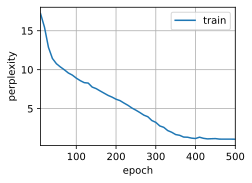

In [5]:
vocab_size,num_hiddens,device = len(vocab),256,d2l.try_gpu()
num_epochs,lr = 500,1
model =d2l.RNNModelScratch(len(vocab),num_hiddens,device,get_params,init_gru_state,gru)

d2l.train_ch8(model,train_iter,vocab,lr,num_epochs,device)